<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week6_SVRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Variable Linear Regression I 
## Quick Review

In the next two videos, we review the concept of single variable linear regression and show 3 ways derive the standard coefficient estimates.


These are 

1. Least-square fit
2. As finding the nearest point in a certain subspace (Linear Algrebra approach)
3. As an MLE estimation (next video)

## Basic Problem

There are $N$ sample pairs of point $(x_i,y_i), i = 1,...,N$  

The model is believed to be

$$Y = \alpha + \beta X + \epsilon$$

where $\epsilon$ is some kind of error term.

A plot of the data might show this:

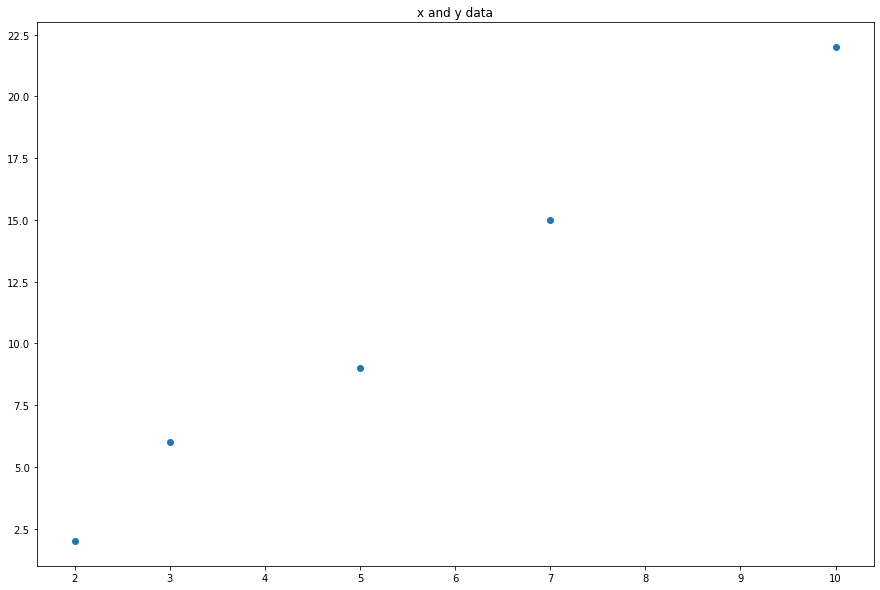

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


xdata = np.array([2,3,5, 7, 10])

ydata = np.array([2,6,9,15,22])

plt.figure(figsize=(15,10))

plt.scatter(xdata, ydata)

plt.title("x and y data")

plt.show()



One can see that these pointss rooughly fall on a line (not perfectly) and the idea is to ask, "What is best-fit line"?


In order to answer that question, we need to measure "fit", and the most coommon approach is to measure the sum squared error.  That is not the only approach, but we will dicuss that later.


Given a choice of $(\alpha, \beta)$, we calculate the residual as

$$\epsilon_i = (\alpha + \beta x_i) - y_i $$


We seek to minimize the quantity $Q(\alpha, \beta) = \sum_{i=1}^N \epsilon_i^2$


As per the usual Calculus based proceedure, we calculate the gradient of $Q$.


$$\frac{\partial Q}{\partial \alpha} = \sum_{i=1}^N 2 \epsilon_i \frac{\partial \epsilon_i}{\partial \alpha} \\
\sum_{i=1}^N 2 \left(y_i - (\alpha + \beta x_i) \right) $$

Setting this to zero we conclude that

$$\sum_{i=1}^N y_i  = \sum_{i=1}^N(\alpha + \beta x_i)$$

or equivalently 


Looking at the other partial derivative,

$$\sum_{i=1}^N \epsilon_i = 0$$



$$\frac{\partial Q}{\partial \beta} = \sum_{i=1}^N 2 \epsilon_i \frac{\partial \epsilon_i}{\partial \beta} \\
= \sum_{i=1}^N 2 \left(y_i - (\alpha + \beta x_i) \right)(x_i)$$



From  which we extract the following equivalent system of equations

$$N \alpha + \left( \sum_{i=1}^N x_i \right) \beta = \sum_{i=1}^N y_i\\
  \left( \sum_{i=1}^N x_i \right)\alpha + \left( \sum_{i=1}^N x_i^2 \right) \beta =  \sum_{i=1}^N x_iy_i$$
  
  
This is easily solved (e.g. Cramer's rule) as

$$\alpha =\frac{\left( \sum_{i=1}^N x_i^2 \right)\left( \sum_{i=1}^N y_i \right) - \left( \sum_{i=1}^N x_i \right)\left( \sum_{i=1}^N x_i y_i\right)}{\Delta} $$

$$\beta = \frac{N\left( \sum_{i=1}^N x_iy_i \right) - \left( \sum_{i=1}^N x_i \right)\left( \sum_{i=1}^N  y_i\right)}{\Delta} $$

where

$$\Delta = N\left( \sum_{i=1}^N x_i^2 \right) - \left( \sum_{i=1}^N x_i \right)^2$$

Let's apply this to our example and plot:

In [ ]:
delta = len(xdata)*np.sum(xdata**2)  - xdata.sum()**2

alpha = ( np.sum(xdata**2)*ydata.sum() - xdata.sum()*np.sum(xdata*ydata)  )/delta

beta = ( len(xdata)*np.sum(xdata*ydata) - xdata.sum()* ydata.sum() )/delta

print("The alpha estimate is ", alpha)

print("The beta estimate is ", beta)


The alpha estimate is  -2.3592233009708736
The beta estimate is  2.436893203883495


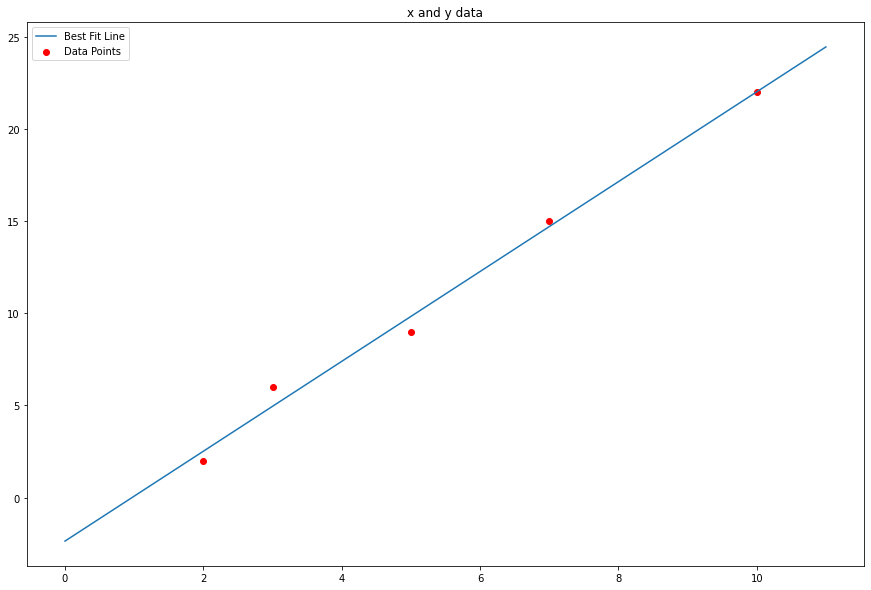

In [ ]:
x = np.linspace(0,11)

plt.figure(figsize=(15,10))

plt.scatter(xdata, ydata, color ='r', label ="Data Points")

plt.plot(x, alpha + beta*x, label = "Best Fit Line")

plt.title("x and y data")

plt.legend()

plt.show()

## Linear Algrebra View

Another way to look at this is to think in terms of vector spaces. 

We have the vectors:

$$\mathbf{b} = \begin{bmatrix}\alpha \\ \beta \\ \end{bmatrix} \in \mathbb{R}^2$$

$$\mathbf{X} = \begin{bmatrix}x_1 \\ x_2 \\ \vdots\\ x_N \\ \end{bmatrix}\in \mathbb{R}^N $$


$$\mathbf{Y} = \begin{bmatrix}y_1 \\ y_2 \\ \vdots\\ y_N \\ \end{bmatrix}\in \mathbb{R}^N $$



$$\mathbf{1}_N = \begin{bmatrix}1 \\ 1 \\ \vdots\\ 1 \\ \end{bmatrix}\in \mathbb{R}^N $$

and the $N \times 2$ Data Matrix

$$A = \begin{bmatrix}\mathbf{1}_N  & \mathbf{X} \\ \end{bmatrix}$$


If things were perfect, (the residuals all zero), the we would have the matrix equation $A\mathbf{b} = \mathbf{Y}$

Which we would attempt to solve for $\mathbf{b}$.  Unfortunately, the columnn space of $A$ is only a 2 dimensional subspace of $\mathbb{R}^N$.  So, unless we were extremely lucky, we would expect that we cannot get perfect fit (hence, residials). 

But can we get a point in column space that is as "close as posssible" to $\mathbf{Y}$?  The answer is yes because we know from linear algrebra that there is a unique decomposition:

$\mathbf{Y} = \mathbf{Y}_{c(A)} + \mathbf{Y}_{c(A)^{\perp}}$

where

$c(A)$ is the column space of $A$ and $c(A)^{\perp}$ is its orthogonal complement.

It is also true that $\mathbf{Y}_{c(A)}$ is the nearet point in $c(A)$ to $\mathbf{Y}$ when measured by Euclidian distance.

But we can also uniquely solve (because it's in the column space and non-trivial)

$$A \mathbf{b} = \mathbf{Y}_{c(A)}$$

Starting here, we multiply both sides by $A^T$ (we can't directly invert $A$ because it's not square).


$$A^TA \mathbf{b} = A^T\mathbf{Y}_{c(A)}$$

Unless all the $x_i$' are the same, the column space of $A$ is 2-dimensional, so we can invert the $2 \times 2$ matrix $A^TA$. Hence

$$\mathbf{b} =  (A^TA)^{-1}A^T\mathbf{Y}_{c(A)}$$

However, returning to our decoposition 

$$\mathbf{Y} = \mathbf{Y}_{c(A)} + \mathbf{Y}_{c(A)^{\perp}}$$, it follows by construction that

$$A^T \mathbf{Y}_{c(A)^{\perp}} = \mathbf{0}$$

And therefore it is also true that

$$\mathbf{b} =  (A^TA)^{-1}A^T\mathbf{Y}$$



Hence we can perform our fit via linear algrebra.  Futhermore, the vector of residuals $\mathbf{\epsilon} = - \mathbf{Y}_{c(A)^{\perp}}$ so because it the nearest point under the Euclidian metric, we literally have minimized the sum squared errors.


Let's do this for our example (we should get the same coeffecients):

















In [ ]:
A = np.array([np.ones(len(xdata)),xdata ]).T
A



array([[ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  5.],
       [ 1.,  7.],
       [ 1., 10.]])

In [ ]:
b = np.linalg.inv(A.T@A)@A.T@ydata
b

array([-2.3592233,  2.4368932])

Finally, we note that the matrix $(A^TA)^{-1}A^T$ is called the pseudo-inverse (or sometimes the Penrose inverse) of $A$.  Numpy has this explictly coded



In [ ]:
np.linalg.pinv(A)@ydata

array([-2.3592233,  2.4368932])